In [1]:
import sklearn
import mglearn
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

форма массива X: (26, 2)


c:\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


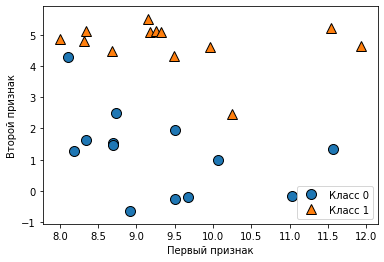

In [3]:
# Синтетический набор для классификации
# генерируем набор данных
X, y = mglearn.datasets.make_forge()
# строим график для набора данных
%matplotlib inline
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Класс 0", "Класс 1"], loc=4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
print("форма массива X: {}".format(X.shape))

Text(0, 0.5, 'Целевая переменная')

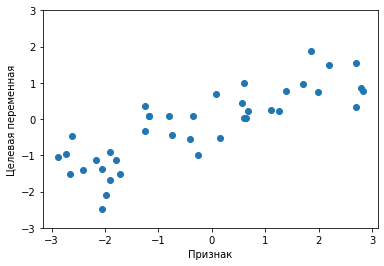

In [5]:
# Синтетический набор для регрессии
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")

Работа алгоритмов на таких низкоразмерных данных легко визуализировать на графиках

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Ключи cancer(): \n{}".format(cancer.keys()))

Ключи cancer(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [9]:
print("Количество примеров для каждого класса:\n{}".format(
 {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))


Количество примеров для каждого класса:
{'malignant': 212, 'benign': 357}


In [10]:
print("Имена признаков:\n{}".format(cancer.feature_names))

Имена признаков:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
# Данные для регресси
from sklearn.datasets import load_boston
boston = load_boston()
print("форма массива data для набора boston: {}".format(boston.data.shape))

форма массива data для набора boston: (506, 13)


В данном случае мы
более детально проанализируем набор данных, учтя не только 13
измерений в качестве входных признаков, но и приняв во внимание все
взаимодействия (interactions) между признаками. Иными словами, мы
будем учитывать в качестве признаков не только уровень преступности
и удаленность от радиальных магистралей по отдельности, но и
взаимодействие уровень преступности–удаленность от радиальных
магистралей. Включение производных признаков называется
конструированием признаков (feature engineering), которое мы
рассмотрим более подробно в главе 4.

Полученные 104 признака – 13 исходных признаков плюс 91
производный признак.

In [13]:
X, y = mglearn.datasets.load_extended_boston()
print("форма массива X: {}".format(X.shape))

форма массива X: (506, 104)


## Анализ алгоритма k-ближайших соседей

c:\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


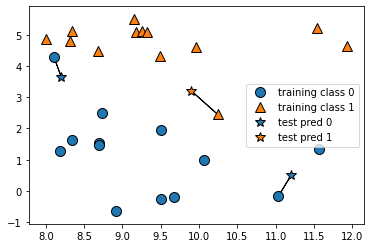

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=1)


Когда мы
рассматриваем более одного соседа, для присвоения метки используется
голосование (voting).

c:\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


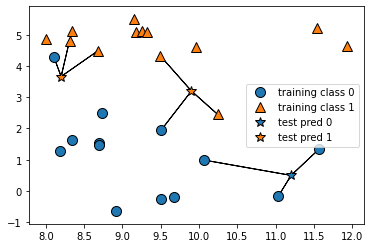

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Модель k-ближайших соседей

In [34]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

c:\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [35]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [36]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
y_train

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [38]:
print("Прогнозы на тестовом наборе: {}".format(clf.predict(X_test)))

Прогнозы на тестовом наборе: [1 0 1 0 1 0 0]


In [39]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(X_test, y_test)))


Правильность на тестовом наборе: 0.86


Кроме того, для двумерных массивов данных мы можем показать
прогнозы для всех возможных точек тестового набора, разместив в
плоскости ху. Мы зададим цвет плоскости в соответствии с тем классом,
который будет присвоен точке в этой области. Это позволит нам
сформировать границу принятия решений (decision boundary), которая
разбивает плоскость на две области: область, где алгоритм присваивает
класс 0, и область, где алгоритм присваивает класс 1.

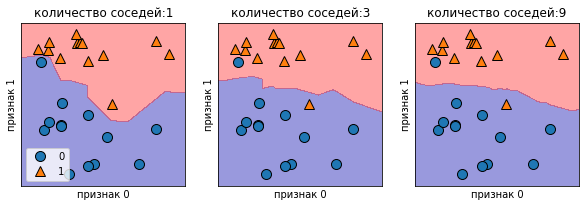

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
# создаем объект-классификатор и подгоняем в одной строке
 clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("количество соседей:{}".format(n_neighbors))
 ax.set_xlabel("признак 0")
 ax.set_ylabel("признак 1")
axes[0].legend(loc=3)

Давайте выясним, существует ли взаимосвязь между сложностью
модели и обобщающей способностью, о которой мы говорили ранее. Мы
сделаем это с помощью реального набора данных Breast Cancer. Начнем
с того, что разобьем данные на обучающий и тестовый наборы. Затем мы
оценим качество работы модели на обучающем и тестовом наборах с
использованием разного количества соседей. Результаты показаны на
рис. 2.7:

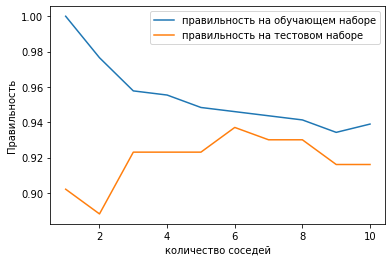

In [45]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
 # строим модель
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # записываем правильность на обучающем наборе
 training_accuracy.append(clf.score(X_train, y_train))
 # записываем правильность на тестовом наборе
 test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
plt.legend()


Регрессия k-ближайших соседей

In [46]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import euclidean_distances

from mglearn.datasets import make_wave
from mglearn.plot_helpers import cm3

In [48]:
def plot_knn_regression(n_neighbors=1):
    X, y = make_wave(n_samples=40)
    X_test = np.array([[-2], [-1.5], [0.9], [1.5]])

    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    plt.figure(figsize=(10, 6))

    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)
    y_pred = reg.predict(X_test)

    for x, y_, neighbors in zip(X_test, y_pred, closest.T):
        for neighbor in neighbors[:n_neighbors]:
                plt.arrow(x[0], y_, X[neighbor, 0] - x[0], y[neighbor] - y_,
                          head_width=0, fc='k', ec='k')

    train, = plt.plot(X, y, 'o', c=cm3(0))
    test, = plt.plot(X_test, -3 * np.ones(len(X_test)), '*', c=cm3(2),
                     markersize=20)
    pred, = plt.plot(X_test, y_pred, '*', c=cm3(0), markersize=20)
    plt.vlines(X_test, -3.1, 3.1, linestyle="--")
    plt.legend([train, test, pred],
               ["training data/target", "test data", "test prediction"],
               ncol=3, loc=(.1, 1.025))
    plt.ylim(-3.1, 3.1)
    plt.xlabel("Feature")
    plt.ylabel("Target")

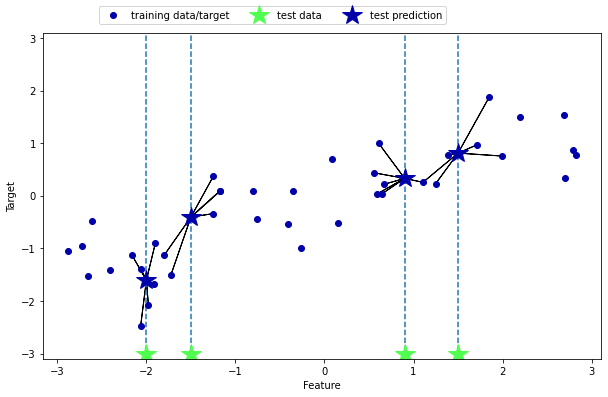

In [58]:
plot_knn_regression(n_neighbors=6)

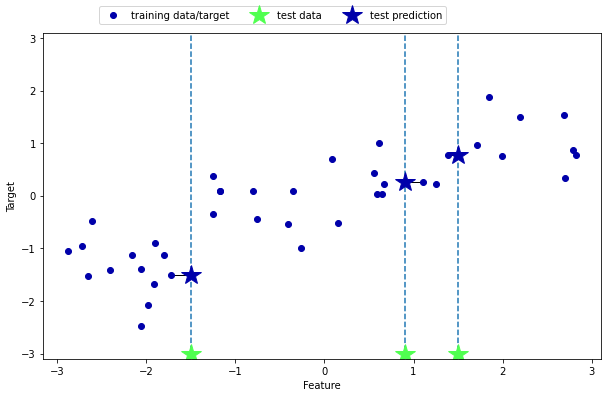

In [59]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

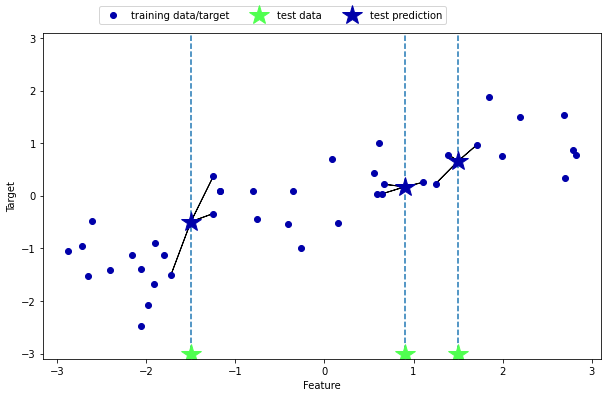

In [60]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [61]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# разбиваем набор данных wave на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# создаем экземпляр модели и устанавливаем количество соседей равным 3
reg = KNeighborsRegressor(n_neighbors=3)
# подгоняем модель с использованием обучающих данных и обучающих ответов
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [62]:
print("Прогнозы для тестового набора:\n{}".format(reg.predict(X_test)))

Прогнозы для тестового набора:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


Кроме того, мы можем оценить качество модели с помощью метода
score, который для регрессионных моделей возвращает значение R
2
. R
2

In [63]:
print("R^2 на тестовом наборе: {:.2f}".format(reg.score(X_test, y_test)))

R^2 на тестовом наборе: 0.83


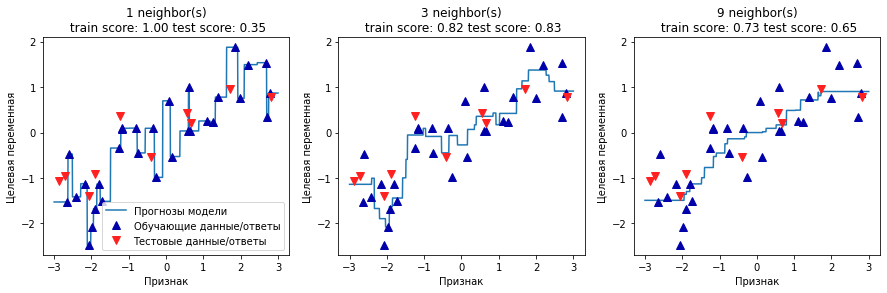

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# создаем 1000 точек данных, равномерно распределенных между -3 и 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
 # получаем прогнозы, используя 1, 3, и 9 соседей
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Признак")
 ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы",
 "Тестовые данные/ответы"], loc="best")

Как видно на графике, при использовании лишь одного соседа каждая
точка обучающего набора имеет очевидное влияние на прогнозы, и
предсказанные значения проходят через все точки данных. Это приводит
к очень неустойчивым прогнозам. Увеличение числа соседей приводит к
получению более сглаженных прогнозов, но при этом снижается
правильность подгонки к обучающим данным.

В принципе, в классификаторе KNeighbors есть два важных параметра:
количество соседей и мера расстояния между точками данных.

Вопрос, связанный с выбором правильной меры расстояния,
выходит за рамки этой книги. По умолчанию используется евклидово
расстояние, которое хорошо работает во многих ситуациях.

Одним из преимуществ метода ближайших соседей является то, что
эту модель очень легко интерпретировать и, как правило, этот метод дает
приемлемое качество без необходимости использования большого
количества настроек